<div align="center">
<h1>Penguin Classification Neural Network</h1>
</div>

***[Click here to download the dataset](https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset?resource=download)***

![penguins image](dataset-cover.png)

In [387]:
# Importing the libraries

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


device = ("cuda" if torch.cuda.is_available() else "cpu")
    

# Hyperparameters

num_epochs = 15000
learning_rate = 0.0001

# Classes in dataset

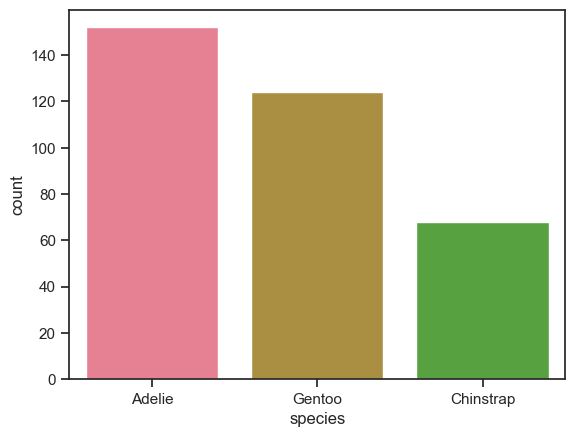

In [388]:
data = pd.read_csv("penguins.csv")

# Classes count in dataset
sns.countplot(x = 'species', data=data)
plt.show()

# A brief look at the dataset attributes

Dataset:

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  
0         3750

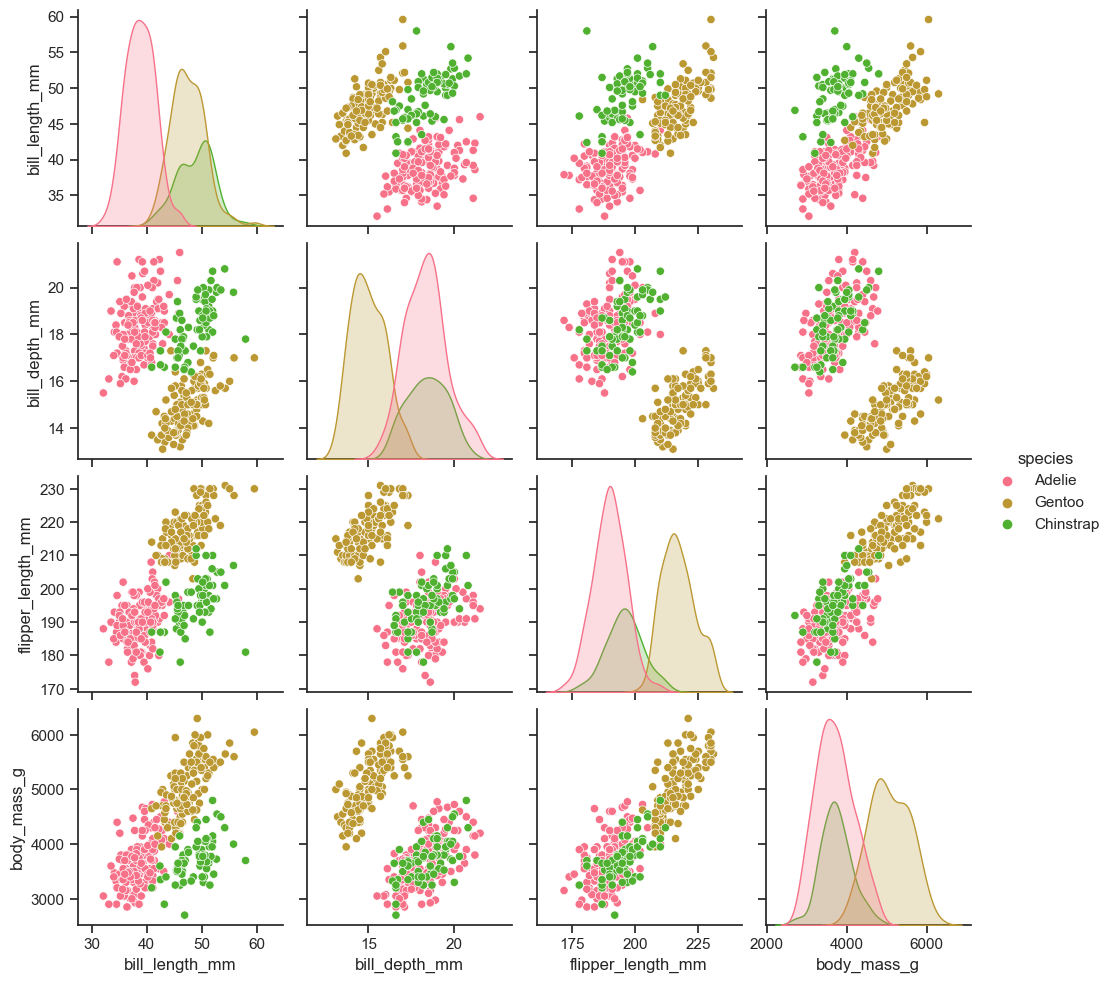

In [389]:
print(f"Dataset:\n\n{data}")

# set plot style
sns.set(style="ticks")
sns.set_palette("husl")

# create plots over all dataset; for subset use iloc indexing
sns.pairplot(data, hue="species")

# display plots using matplotlib
plt.show()

# Data preprocessing

In [390]:
# Data preprocessing

data = pd.read_csv("penguins.csv")

data_cleaned = data.dropna()
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

print(f"Fixed data:\n\n{data_cleaned}")

Fixed data:

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  
0         3

# Encoding the data

In [391]:
# split data into input (X - select the first four columns) and output (y - select last column)

data_encoded = pd.get_dummies(data_cleaned, columns=["species", "island", "sex"])

X = data_encoded.drop(columns=["species_Adelie", "species_Chinstrap", "species_Gentoo"], axis=1)
Y = data_encoded[["species_Adelie", "species_Chinstrap", "species_Gentoo"]]

In [392]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [393]:
# Convert input and output data to tensors

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Use dtype=torch.long for CrossEntropyLoss
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define the model

In [394]:
model = nn.Sequential(
    nn.Linear(9, 36),
    nn.ReLU(),
    nn.Linear(36, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=9, out_features=36, bias=True)
  (1): ReLU()
  (2): Linear(in_features=36, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)


In [395]:
# Define the optimizer and loss function

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Training the model

In [396]:
# Initialize empty lists to store the loss and accuracy values
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(num_epochs + 1):
    # Training
    preds = model(X_train_tensor)
    y_train_np = y_train.values  # Convert y_train to NumPy array
    y_train_tensor_float = torch.from_numpy(y_train_np).float()  # Convert NumPy array to tensor
    train_loss = criterion(preds, y_train_tensor_float)
    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_accuracy = (y_train_tensor_float.argmax(-1) == preds.argmax(-1)).sum().item() / len(y_train)

    # Testing
    with torch.no_grad():  # No need to compute gradients during evaluation
        preds = model(X_test_tensor)
        y_test_np = y_test.values  # Convert y_test to NumPy array
        y_test_tensor_float = torch.from_numpy(y_test_np).float()  # Convert NumPy array to tensor
        test_loss = criterion(preds, y_test_tensor_float)
        test_accuracy = (y_test_tensor_float.argmax(-1) == preds.argmax(-1)).sum().item() / len(y_test)

    # Store loss and accuracy values
    train_losses.append(train_loss.item())
    train_accs.append(train_accuracy)
    test_losses.append(test_loss.item())
    test_accs.append(test_accuracy)

    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} Train Loss: {train_loss.item():.4f} Train Acc: {train_accuracy:.4f} "
              f"Test Loss: {test_loss.item():.4f} Test Acc: {test_accuracy:.4f}")

Epoch: 0 Train Loss: 126.8764 Train Acc: 0.3797 Test Loss: 133.1138 Test Acc: 0.2687
Epoch: 1000 Train Loss: 0.8054 Train Acc: 0.6353 Test Loss: 0.8276 Test Acc: 0.5970
Epoch: 2000 Train Loss: 0.6369 Train Acc: 0.7481 Test Loss: 0.6334 Test Acc: 0.7164
Epoch: 3000 Train Loss: 0.5217 Train Acc: 0.8346 Test Loss: 0.5122 Test Acc: 0.8358
Epoch: 4000 Train Loss: 0.4081 Train Acc: 0.9135 Test Loss: 0.3938 Test Acc: 0.9403
Epoch: 5000 Train Loss: 0.2924 Train Acc: 0.9511 Test Loss: 0.2720 Test Acc: 0.9701
Epoch: 6000 Train Loss: 0.2033 Train Acc: 0.9662 Test Loss: 0.1700 Test Acc: 0.9851
Epoch: 7000 Train Loss: 0.1251 Train Acc: 0.9850 Test Loss: 0.1145 Test Acc: 0.9851
Epoch: 8000 Train Loss: 0.0803 Train Acc: 0.9925 Test Loss: 0.0720 Test Acc: 0.9851
Epoch: 9000 Train Loss: 0.0541 Train Acc: 0.9925 Test Loss: 0.0460 Test Acc: 1.0000
Epoch: 10000 Train Loss: 0.0394 Train Acc: 0.9925 Test Loss: 0.0305 Test Acc: 1.0000
Epoch: 11000 Train Loss: 0.0307 Train Acc: 0.9925 Test Loss: 0.0208 Test A

# Final evaluation of model 

In [397]:
y_pred = model(X_test_tensor)  # Assuming X_test_tensor is the test data tensor

y_test_class = y_test_tensor.argmax(dim=1)  # Convert y_test_tensor to class indices
y_pred_class = y_pred.argmax(dim=1)  # Convert y_pred to class indices

# Convert tensors to numpy arrays
y_test_class = y_test_class.detach().numpy()
y_pred_class = y_pred_class.detach().numpy()


print(f"Confusion matrix:\n\n{confusion_matrix(y_test_class, y_pred_class)}")

Confusion matrix:

[[39  0  0]
 [ 0 10  0]
 [ 0  0 18]]


# Classification report

In [398]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



# Loss plot

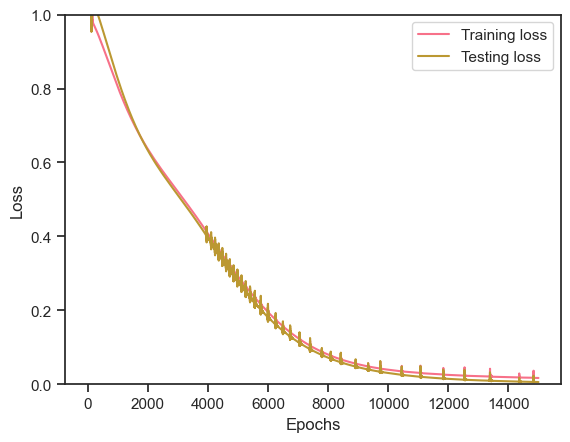

In [399]:
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Set the y-axis range
plt.ylim([0, 1])

plt.show()

# Accuracy plot

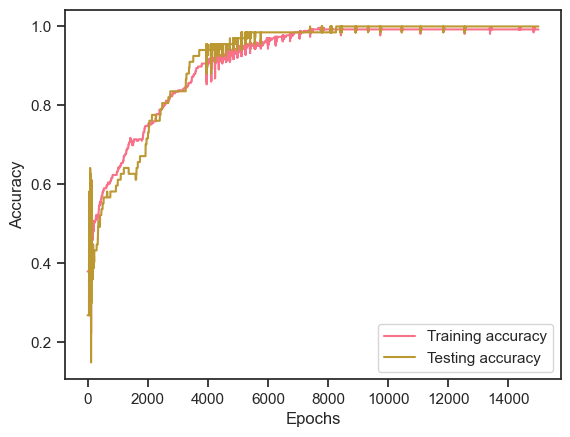

In [400]:
plt.plot(train_accs, label="Training accuracy")
plt.plot(test_accs, label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# After all, save the model for later inference

In [401]:
#torch.save(model.state_dict(), 'penguinModel.pth')

# Load the model with this code if needed:
#model.load_state_dict(torch.load('penguinModel.pth'))